In [1]:
# Importe les Librairies
from sklearn.svm import SVC
from sklearn import datasets, model_selection, preprocessing, decomposition
import svm_source
import numpy as np
import matplotlib.pyplot as plt

# Mise en Oeuvre

In [2]:
# Charge les données Iris
scaler = preprocessing.StandardScaler()
iris = datasets.load_iris()
X = iris.data
X = scaler.fit_transform(X)
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]

### Question 1/2

##### Kernel Linéaire

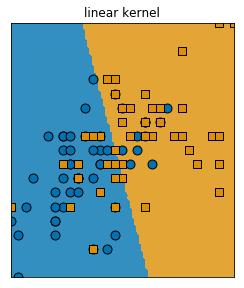

In [3]:
# definit un modèle SVM avec kernel linéaire
clf_linear = SVC(kernel='linear',gamma='scale')
clf_linear.fit(X, y)
# plot la prediction du modèle
plt.figure(figsize=(4,6))
svm_source.frontiere(clf_linear.predict, X, y, step=100,colorbar=False)
plt.title('linear kernel')
plt.show()

In [4]:
# calcul la performance généralisée en divisant Xtrain/Xtest plusieurs fois 
n_iter = 100
linear_scores = []
for k in range(n_iter):
    Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X, y, test_size=0.5) # créer 2 échantillons 50%-50% aléatoirement choisi
    clf_linear.fit(Xtrain, Ytrain)
    linear_scores.append(clf_linear.score(Xtest,Ytest))
print("mean score = " + str(np.mean(linear_scores)))

mean score = 0.6834


##### Kernel Polynomial

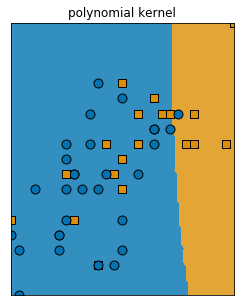

In [5]:
# definit un modèle SVM avec kernel linéaire
plt.figure(figsize=(4,6))
clf_pol = SVC(kernel='poly',gamma='scale') # on garde les hyperparametres par défaut (degree=3, coef0=0)
clf_pol.fit(Xtrain, Ytrain)
# plot la prediction du modèle
svm_source.frontiere(clf_pol.predict, Xtrain, Ytrain, step=100,colorbar=False)
plt.title('polynomial kernel')
plt.show()

In [6]:
# calcul la performance généralisée en divisant Xtrain/Xtest plusieurs fois 
clf_poly = SVC(kernel='poly',gamma='scale')
n_iter = 100
poly_scores = []
for k in range(n_iter):
    Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X, y, test_size=0.5) # créer 2 échantillons 50%-50% aléatoirement choisi
    clf_poly.fit(Xtrain, Ytrain)
    poly_scores.append(clf_poly.score(Xtest,Ytest))
print("mean score = " + str(np.mean(poly_scores)))

mean score = 0.5856


$\underline{\text{conclusion:}}  \text{ Rendre le modèle plus complexe ne donne pas forcément une meilleur performance. }$

$\text{Pour aller plus loin avec le kernel polynomial, il faudrait chercher à optimiser les hyperparamètres (degree et coef0) du modèle.}$

### Question 3

$\underline{\text{problème primal SVM : }}$ 
$$\min_{w,w_0} \frac{1}{2}||w||^2 + C \sum_{i=1}^n \xi_i \\
\text{sc } \forall i,\ y_i(w^T\Phi(x_i)+w_0) \geq 1 - \xi_i\ \text{ et } \xi_i \geq 0 $$

$\text{Dans le problème de minimisation, on veut que } \sum_i^n \xi_i \text{ soit minimale.}$

$\text{Et, on veut également que les } \xi_i \text{ respectent les contraintes :}$ 

$ \quad \quad  y_i(w^T\Phi(x_i)+w_0) \geq 1 - \xi_i \text{ et } \xi_i \geq 0 $

$ \implies     1 - y_i(w^T\Phi(x_i)+w_0) \leq \xi_i \text{ et } 0 \leq \xi_i$

$\text{Les plus petits $\xi_i$ qui vérifient les contraintes sont donc } \xi_i = \max\left(0,1 - y_i(w^T\Phi(x_i)+w_0)\right) $

$\text{d'où,}$
        $$\min_{w,w_0} \frac{1}{2}||w||^2 + C \sum_{i=1}^n [1-y_i(w^T\Phi(x_i)+w_0)]_+ $$


### Question 4

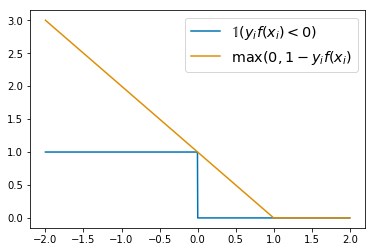

In [7]:
y = np.linspace(-2, 2, 1000)
plt.plot(y, y < 0,label='$\mathbb{1}(y_if(x_i)<0)$')
plt.plot(y, np.maximum(0, 1 - y),label='$\max(0,1 - y_if(x_i)$')
plt.legend(fontsize='x-large')
plt.show()

$\max(0,1 - y_if(x_i) \text{ est bien un majorant convexe de } \mathbb{1}y_if(x_i)<0$

$\text{Et, on a les 3 cas:}$

$\text{   $y_if(x_i) > 1$ , le point est "en dehors" de la marge. (pas de contribution à la pénalisation)}$

$\text{   $y_if(x_i) = 1$ , le point est  sur la marge}$

$\text{   $y_if(x_i) < 1$ , le point est "à l'intérieur" de la marge. (contribution à la pénalisation)}$

# SVM GUI

![title](SVM_GUI.png)

$\text{ Quand C diminue, alors la marge augmente (et les erreurs de classification également).}$

$\text{ Pour un cas où les classes sont déséquilibrées, ce phénomène est également visible et les points de la classe en sous nombres finissent par être }$

$\text{ tous mal classé par la SVM.}$

$\longrightarrow \text{ On peut corriger ce phénomène en mettant un poids élevé sur ces points là.}$

# Classification de visages

In [8]:
# Charge les données
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=200) # garde les 2 classes qui ont plus de 140 observations
n_samples, h, w = lfw_people.images.shape

In [9]:
# Normalise
X = lfw_people.data
X = preprocessing.StandardScaler().fit_transform(X)
y = lfw_people.target

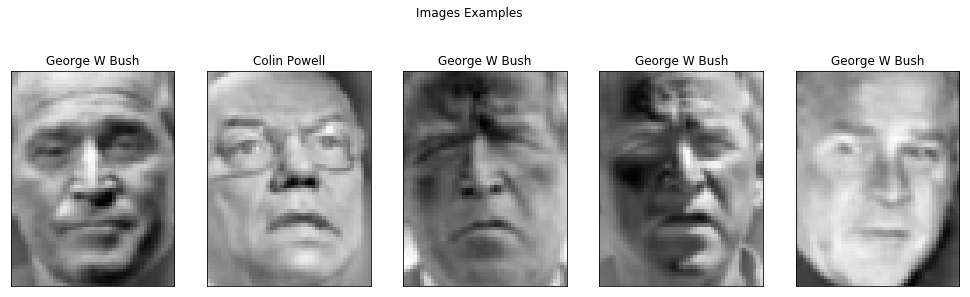

In [10]:
# plot quelques exemples
plt.figure(figsize=(17, 5))
plt.suptitle("Images Examples")
for i in range(5):
    plt.subplot(1, 5, i + 1)
    image_k = np.random.randint(n_samples)
    plt.imshow(X[image_k].reshape((h, w)), cmap=plt.cm.gray)
    plt.title(lfw_people.target_names[lfw_people.target[image_k]], size=12)
    plt.xticks(())
    plt.yticks(())

## Question 5

$\text{Si on ne réduisait pas nos données, alors on ne pénalerisait pas de la même façon toute les variables.}$
       
$\text{Et il faut centrer pour ne pas pénaliser l'intercept.}$


## Question 6
Montrez l’influence du paramètre de régularisation : afficher l’erreur de
prédiction en fonction de $C$ sur une échelle logarithmique entre $10^{-5}$ et $10^5$

In [11]:
# divise en ensemble Train/Test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

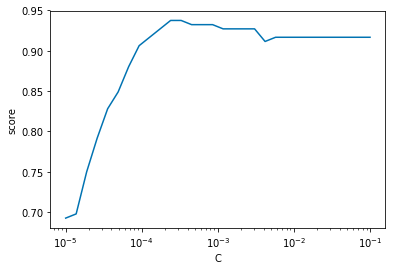

In [12]:
# Evolution du score (kernel linéaire) en fonction de l'hyperparametre C
scores = []
C_grid = np.logspace(-5,-1,num=30)
for C_value in C_grid:
    clf = SVC(kernel='linear',C=C_value,gamma='scale')
    clf = clf.fit(X_train, y_train)
    scores.append(clf.score(X_test,y_test))
    
plt.figure()
plt.plot(C_grid,scores,'-')
plt.xscale('log'),plt.xlabel('C'),plt.ylabel('score')
plt.show()

In [13]:
# Confirme la valeur du C optimal avec GridSearchCV
clf_linear = model_selection.GridSearchCV(SVC(kernel='linear',gamma='scale'), {'C': C_grid}, cv=5, iid=False)
clf_linear.fit(X_train, y_train)
print("C_opt_linear = ",clf_linear.best_params_)
print("score_linear = ",clf_linear.score(X_test,y_test))

C_opt_linear =  {'C': 0.0006210169418915617}
score_linear =  0.9322916666666666


## Question 7
En ajoutant des variables de nuisances (par exemple 300 variables normales centrées réduites),
augmentant ainsi le nombre de variables à nombre de points d’apprentissage fixé, montrez que la
performance chute.

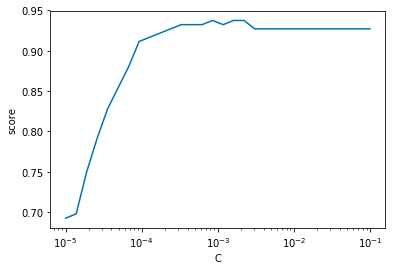

In [14]:
# ajout de 300 X random dans nos données
noise_train = np.random.randn(X_train.shape[0], 300)
X_train2 = np.concatenate((X_train, noise_train), axis=1)
noise_test = np.random.randn(X_test.shape[0], 300)
X_test2 = np.concatenate((X_test, noise_test), axis=1)
# Affiche l'évolution de la performance avec C
scores = []
for C_value in C_grid:
    clf = SVC(kernel='linear',C=C_value,gamma='scale')
    clf = clf.fit(X_train2, y_train)
    scores.append(clf.score(X_test2,y_test))
    
plt.figure()
plt.plot(C_grid,scores,'-')
plt.xscale('log'), plt.xlabel('C'), plt.ylabel('score')
plt.show()

In [15]:
# Confirme la valeur du C optimal avec GridSearchCV
clf_noise = model_selection.GridSearchCV(SVC(kernel='linear',gamma='scale'), {'C': C_grid}, cv=5, iid=False)
clf_noise.fit(X_train2, y_train)
print("score_noise = ",clf_noise.score(X_test2,y_test))

score_noise =  0.9322916666666666


$\longrightarrow \text{ En ajoutant des variables de bruits, le score a baissé. }$

## Question 7

In [16]:
# Decomposition PCA
n_components = 150 # les autres composantes ont des valeurs propres proches de 0
pca = decomposition.PCA(n_components=n_components).fit(X_train2)

# Projette les données
X_train_pca = pca.transform(X_train2)
X_test_pca = pca.transform(X_test2)

clf = model_selection.GridSearchCV(SVC(kernel='linear',gamma='scale'), {'C': C_grid}, cv=5, iid=False)
clf.fit(X_train_pca, y_train)
print("score_pca = ",clf.score(X_test_pca,y_test))

score_pca =  0.9322916666666666


$\longrightarrow \text{ La performance ne s'est pas amélioré mais la vitesse de convergence a diminué.} $ 

In [17]:
clf_rbf = model_selection.GridSearchCV(SVC(kernel='rbf',gamma='scale'), {'C': C_grid}, cv=5, iid=False)
clf_rbf.fit(X_train2, y_train)
print("score_rbf = ",clf_rbf.score(X_test2,y_test))

score_rbf =  0.6927083333333334


$\longrightarrow \text{ La performance a diminué (complexité n'implique pas meilleur prédiction).} $ 

# Pour aller plus loin : Calcul du saut de dualité
En vous basant sur cet exemple écrivez un code qui va calculer la valeur des fonctionnelles primales
et duales et vérifiez que les valeurs sont proches. Comment varie la différence entre les deux valeurs
quand on fait varier la tolérance sur l’optimisation (paramètre tol de SVC) ? Vous afficherez la
différence des valeurs des fonctionnelles.

$$fct_{primal} = \frac{1}{2} ||w||^2 + C \sum_i^n \xi_i$$

$$ $$

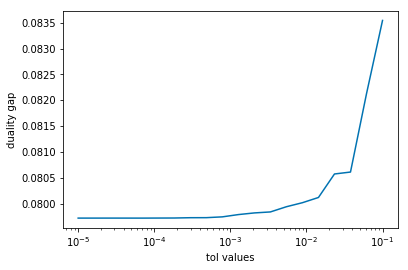

In [18]:
C = 1e-3
tol_values =  np.logspace(-5,-1,num=20)
dual_gaps = []
for tol_value in tol_values:
    # calcul le modèle SVM
    clf_linear = SVC(kernel='linear', C=C, gamma='scale',tol=tol_value)
    clf_linear = clf_linear.fit(X_train, y_train)
    # calcul la valeur de la fonction primale
    w = clf_linear.coef_
    b = clf_linear.intercept_
    xi = 1 - y_train * (np.dot(w,X_train.T) + b)
    fct_primal = 1/2 * np.dot(w,w.T) + C * np.sum(xi)
    # calcul la valeur de la fonction duale
    alpha = clf_linear.dual_coef_.T
    x_support = X_train[clf_linear.support_]
    y_support = y_train[clf_linear.support_]
    fct_dual = sum(alpha) + (-1/2) * sum([alpha[i] * alpha[j] * y_support[i] * y_support[j] * np.dot(x_support[i], x_support[j]) for i in range(x_support.shape[0]) for j in range(x_support.shape[0])])
    
    dual_gaps.append(np.squeeze(abs(fct_dual-fct_primal)))

    

# Plot gap de dualité en fonction de la tolérance
plt.figure()
plt.plot(tol_values, dual_gaps, '-')
plt.xlabel('tolérance'), plt.ylabel('saut de dualité')
plt.xscale('log')
plt.show()

$\longrightarrow  \text{Quand la tolérance diminue, la différence de valeur entre les fonctions primales et duales diminuent également.}$

$ \text{(sûrement dû à une convergence numérique dans les algorithmes de minimisation)}$